In [2]:
import numpy as np

# baseline, 1 label (7), 2 labels (14), 3 labels (21) 5 labels(35)
# accuracy05CE = [0.6779, 0.7792, 0.8511, 0.8109, 0.8602]
# accuracy05CESCL = [0.6779, 0.7792, 0.7982, 0.8881, 0.9469]

accuracy05CE = [0.6779, 0.7793, 0.8511, 0.8105, 0.8604]
accuracy05CESCL = [0.6779, 0.7793, 0.7982, 0.8881, 0.9469]

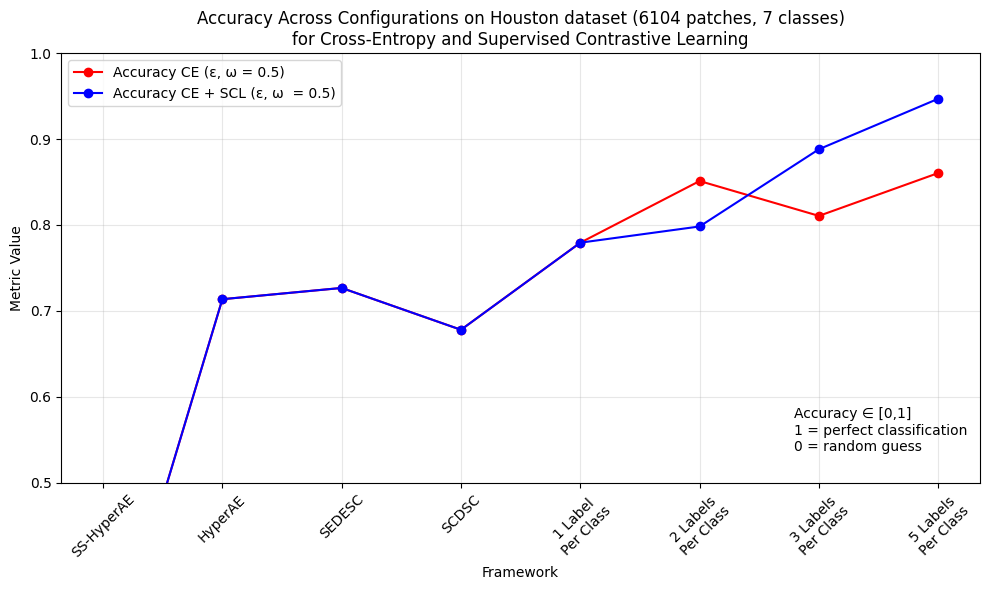

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# (1) Configuration names (x-axis categories)
configurations = ['SS-HyperAE', 'HyperAE', 'SEDESC', 'SCDSC', '1 Label\nPer Class', '2 Labels\nPer Class', '3 Labels\nPer Class', '5 Labels\nPer Class']

# (2) Provided metric values for the first three configurations
houstonHyperAE   = 0.7135
houstonSSHyperAE = 0.2516
houstonSEDESC    = 0.7266


# (4) Build full data arrays for each scaling condition (each will have shape (3,8))
accuracyCE = [houstonSSHyperAE] + [houstonHyperAE] + [houstonSEDESC] + accuracy05CE
accuracyCESCL = [houstonSSHyperAE, houstonHyperAE, houstonSEDESC] + accuracy05CESCL
# (5) Extract each metric for both scaling conditions

# (6) Create the 2D Matplotlib figure
plt.figure(figsize=(10, 6))

# For scaling 0.5 (solid lines)
# plt.plot(configurations, acc_05, marker='o', linestyle='-', color='red', 
#          label='Accuracy (\u03B5 = 0.5) '
#         '\u2208 [0,1]\n'
#         '1 = perfect classification\n'
#         '0 = random guess')
# plt.plot(configurations, nmi_05, marker='o', linestyle='-', color='green', 
#          label='NMI (\u03B5 = 0.5) '
#         '\u2208 [0,1]\n'
#         '1 = perfect agreement with ground truth\n'
#         '0 = no mutual information, random clustering')
# plt.plot(configurations, kappa_05, marker='o', linestyle='-', color='blue', 
#          label='Kappa (\u03B5 = 0.5) '
#                '\u2208 [-1,1]\n'
#         ' 1 = complete agreement\n'
#         ' 0 = agreement by chance\n'
#         '-1 = perfect disagreement')
plt.plot(configurations, accuracyCE, marker='o', linestyle='-', color='red', label='Accuracy CE (\u03B5, \u03C9 = 0.5)')
plt.plot(configurations, accuracyCESCL, marker='o', linestyle='-', color='blue', label='Accuracy CE + SCL (\u03B5, \u03C9  = 0.5)')

# Customize plot
plt.title('Accuracy Across Configurations on Houston dataset (6104 patches, 7 classes)\nfor Cross-Entropy and Supervised Contrastive Learning')
plt.xlabel('Framework')
plt.ylabel('Metric Value')
plt.ylim(.5, 1.0)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
legend = plt.legend(loc='best')
plt.gca().add_artist(legend)

explanation = (
    "Accuracy ∈ [0,1]\n"
    "1 = perfect classification\n"
    "0 = random guess\n"
    # "NMI ∈ [0,1]\n"
    # "1 = perfect agreement with ground truth\n"
    # "0 = no mutual information, random clustering\n"
    # "Kappa ∈ [-1,1]\n"
    # "1 = complete agreement\n"
    # "0 = agreement by chance\n"
    # "-1 = perfect disagreement"
)

# Create a dummy handle with an empty line (invisible) that only serves to hold the explanation text
dummy_handle = mlines.Line2D([], [], linestyle='', label=explanation)

# Create the second legend with the dummy handle, positioned to the right
legend2 = plt.legend(handles=[dummy_handle], loc='lower right', frameon=False)

plt.tight_layout()
plt.show()


In [4]:
accuracy05CESC5LSSKMM = .9322
old = .003
new = .31

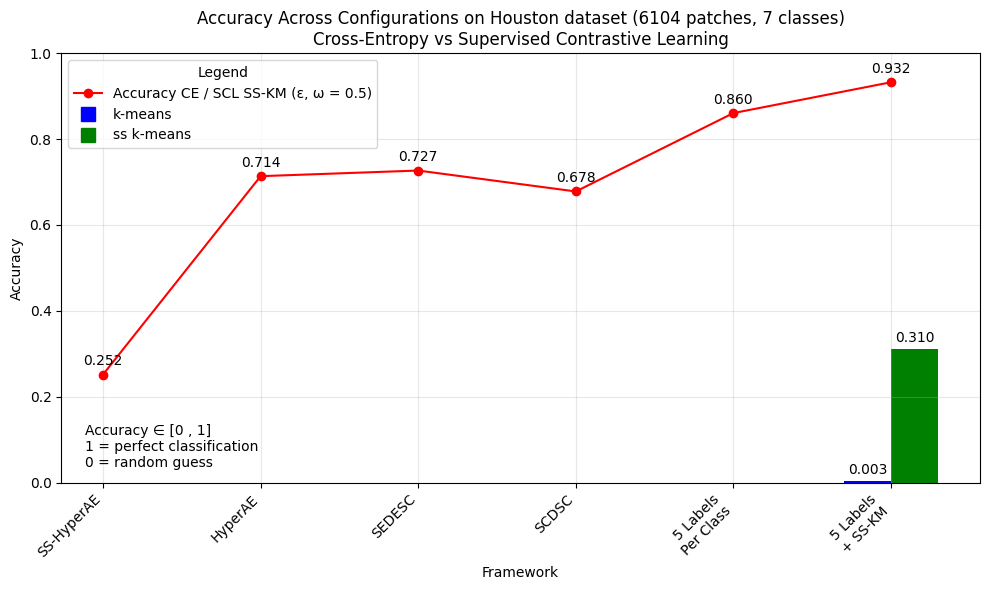

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# ──────────────────────────
# (0)  your special values
accuracy05CESC5LSSKMM = 0.9322   # last point in the red line
old  = 0.003                     # blue bar
new  = 0.310                     # green bar

# ──────────────────────────
# (1)  x–axis categories
configurations = [
    'SS-HyperAE',
    'HyperAE',
    'SEDESC',
    'SCDSC',
    '5 Labels\nPer Class',
    '5 Labels\n+ SS-KM'
]

# ──────────────────────────
# (2)  metric values already given
houstonHyperAE   = 0.7135
houstonSSHyperAE = 0.2516
houstonSEDESC    = 0.7266

# ──────────────────────────
# (3)  build the line-plot data
accuracyCE = [
    houstonSSHyperAE,
    houstonHyperAE,
    houstonSEDESC,
    accuracy05CE[0],
    accuracy05CE[-1],
    accuracy05CESC5LSSKMM
]

x = np.arange(len(configurations))

fig, ax = plt.subplots(figsize=(10, 6))

# ─ line plot ─────────────────────────────────────────────────────
line_handle, = ax.plot(
    x, accuracyCE,
    marker='o', linestyle='-', color='red',
    label='Accuracy CE / SCL SS-KM (ε, ω = 0.5)'
)

for xi, yi in zip(x, accuracyCE):
    ax.text(xi, yi + 0.015, f'{yi:.3f}', ha='center', va='bottom')

# ─ bars on the last tick ─────────────────────────────────────────
bar_width = 0.3
last      = len(x) - 1
bar_pos   = [last - bar_width/2, last + bar_width/2]
bars = ax.bar(bar_pos, [old, new],
              width=bar_width,
              color=['blue', 'green'])

for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            h + 0.01, f'{h:.3f}',
            ha='center', va='bottom')

# handles for the bar colours (square markers in the legend)
bar_handles = [
    mlines.Line2D([], [], marker='s', color='blue',  linestyle='',
                  markersize=10, label='k-means'),
    mlines.Line2D([], [], marker='s', color='green', linestyle='',
                  markersize=10, label='ss k-means')
]

# ─ axes cosmetics ────────────────────────────────────────────────
ax.set_xticks(x)
ax.set_xticklabels(configurations, rotation=45, ha='right')
ax.set_title(
    'Accuracy Across Configurations on Houston dataset '
    '(6104 patches, 7 classes)\n'
    'Cross-Entropy vs Supervised Contrastive Learning'
)
ax.set_xlabel('Framework')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)

# ─────────────── legends ───────────────
# Legend #1 – what colours & symbols mean
legend1 = ax.legend(handles=[line_handle] + bar_handles,
                    loc='upper left', title='Legend')
ax.add_artist(legend1)     # keep it when we add the second legend

# Legend #2 – explanation of the accuracy scale
explanation = "Accuracy ∈ [0 , 1]\n1 = perfect classification\n0 = random guess"
dummy_handle = mlines.Line2D([], [], linestyle='', label=explanation)
ax.legend(handles=[dummy_handle],
          loc='lower left', frameon=False, handlelength=0)

plt.tight_layout()
plt.show()


In [7]:
accuracyCESCL5SSKMTP = 0.9322
missed = 184

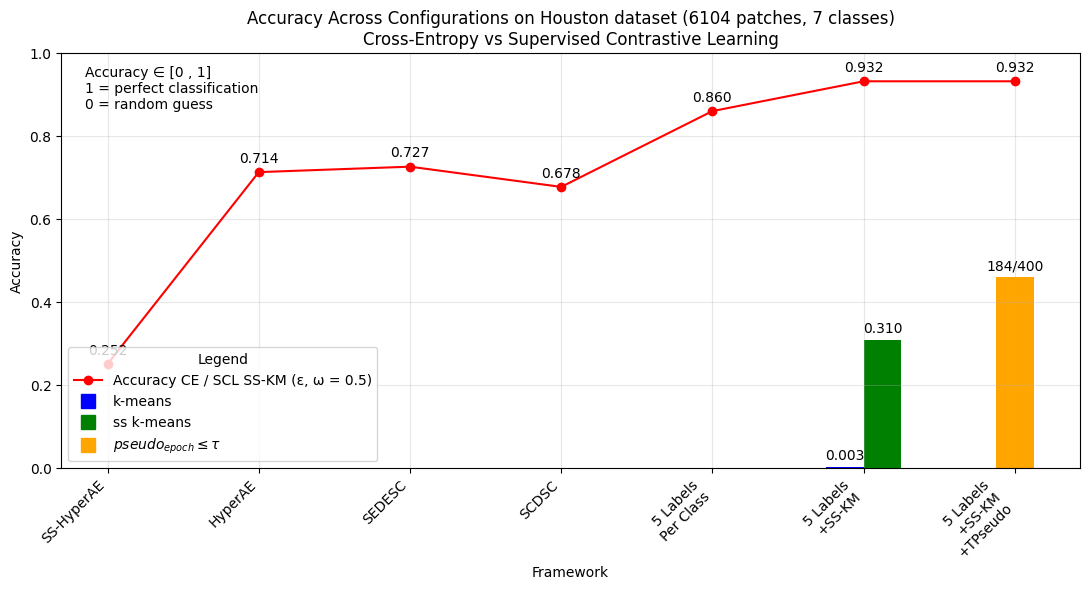

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# ────────────────────────────────
#  special / new values
accuracy05CESC5LSSKMM = 0.9322           # old last point
accuracy05CESCL5SSKMTP   = 0.9322           # new last point
old, new              = 0.003, 0.310     # blue / green bars
tpseudo_num           = missed / 400        # numeric height ≈ 0.46
tpseudo_str           = f"{missed}/400"        # text to display

# ────────────────────────────────
#  x–axis categories (7 now)
configurations = [
    "SS-HyperAE",
    "HyperAE",
    "SEDESC",
    "SCDSC",
    "5 Labels\nPer Class",
    "5 Labels\n+SS-KM",
    "5 Labels\n+SS-KM\n+TPseudo"   # ← new
]

# given metric values
houstonHyperAE   = 0.7135
houstonSSHyperAE = 0.2516
houstonSEDESC    = 0.7266

# line-plot data
accuracyCE = [
    houstonSSHyperAE, houstonHyperAE, houstonSEDESC,
    accuracy05CE[0], accuracy05CE[-1],
    accuracy05CESC5LSSKMM,            # index-5 point
    accuracy05CESCL5SSKMTP               # ← new index-6 point
]

x = np.arange(len(configurations))    # 0 … 6
fig, ax = plt.subplots(figsize=(11, 6))

# ────────────── line plot ──────────────
line_handle, = ax.plot(
    x, accuracyCE, marker='o', linestyle='-', color='red',
    label='Accuracy CE / SCL SS-KM (ε, ω = 0.5)'
)
for xi, yi in zip(x, accuracyCE):
    ax.text(xi, yi + 0.015, f"{yi:.3f}", ha='center', va='bottom')

# ────────────── bars ───────────────────
bar_width = 0.25

# blue / green bars at configuration index 5
idx_old_new = 5
bars_old_new = ax.bar(
    [idx_old_new - bar_width/2, idx_old_new + bar_width/2],
    [old, new], width=bar_width, color=['blue', 'green']
)
for bar in bars_old_new:
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.01, f"{bar.get_height():.3f}",
            ha='center', va='bottom')

# orange TPseudo bar at configuration index 6
idx_tpseudo = 6
bar_tpseudo = ax.bar(
    idx_tpseudo, tpseudo_num, width=bar_width, color='orange'
)
ax.text(idx_tpseudo, tpseudo_num + 0.01,
        tpseudo_str, ha='center', va='bottom')

# handles for legend squares
bar_handles = [
    mlines.Line2D([], [], marker='s', linestyle='', color='blue',   markersize=10, label='k-means'),
    mlines.Line2D([], [], marker='s', linestyle='', color='green',  markersize=10, label='ss k-means'),
    mlines.Line2D([], [], marker='s', linestyle='', color='orange', markersize=10, label='$pseudo_{epoch}\\leq\u03C4$')
]

# ────────────── axes cosmetics ─────────
ax.set_xticks(x)
ax.set_xticklabels(configurations, rotation=45, ha='right')
ax.set_title(
    'Accuracy Across Configurations on Houston dataset '
    '(6104 patches, 7 classes)\n'
    'Cross-Entropy vs Supervised Contrastive Learning'
)
ax.set_xlabel('Framework')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)

# ────────────── legends ────────────────
legend1 = ax.legend(handles=[line_handle] + bar_handles,
                    loc='lower left', title='Legend')
ax.add_artist(legend1)      # keep it when we add legend-2

explanation = "Accuracy ∈ [0 , 1]\n1 = perfect classification\n0 = random guess"
dummy = mlines.Line2D([], [], linestyle='', label=explanation)
ax.legend(handles=[dummy], loc='upper left', frameon=False, handlelength=0)

plt.tight_layout()
plt.show()


In [16]:
accuracyCESCL5SSKMTPFMS = 0.9314

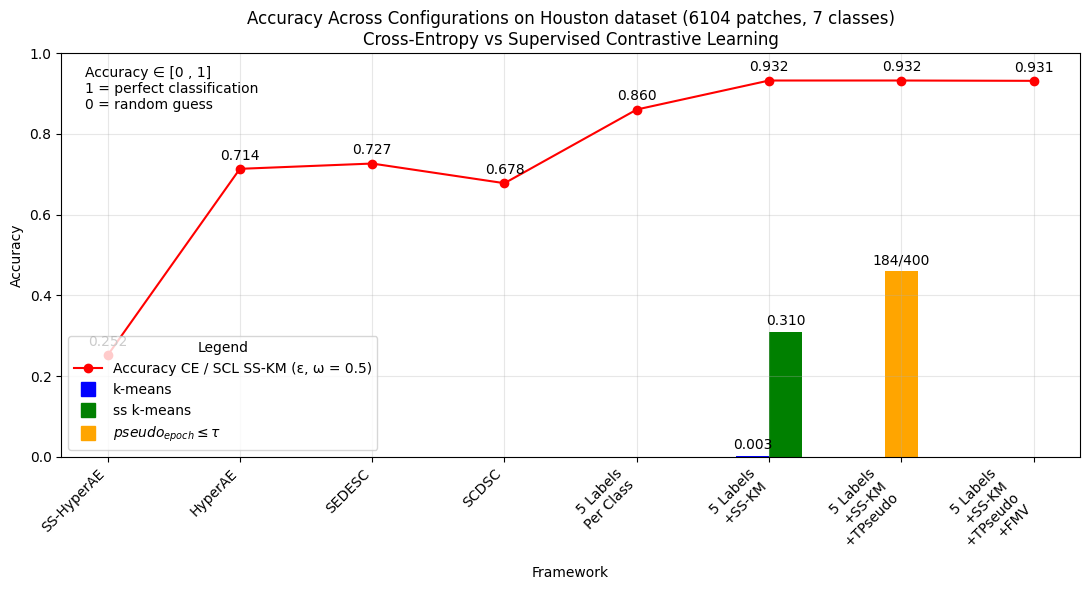

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# ────────────────────────────────
#  special / new values
accuracy05CESC5LSSKMM = 0.9322           # old last point
accuracy05CESCL5SSKMTP   = 0.9322           # new last point
old, new              = 0.003, 0.310     # blue / green bars
tpseudo_num           = missed / 400        # numeric height ≈ 0.46
tpseudo_str           = f"{missed}/400"        # text to display

# ────────────────────────────────
#  x–axis categories (7 now)
configurations = [
    "SS-HyperAE",
    "HyperAE",
    "SEDESC",
    "SCDSC",
    "5 Labels\nPer Class",
    "5 Labels\n+SS-KM",
    "5 Labels\n+SS-KM\n+TPseudo",  
    "5 Labels\n+SS-KM\n+TPseudo\n+FMV"
]

# given metric values
houstonHyperAE   = 0.7135
houstonSSHyperAE = 0.2516
houstonSEDESC    = 0.7266

# line-plot data
accuracyCE = [
    houstonSSHyperAE, houstonHyperAE, houstonSEDESC,
    accuracy05CE[0], accuracy05CE[-1],
    accuracy05CESC5LSSKMM,            # index-5 point
    accuracy05CESCL5SSKMTP,               # ← new index-6 point
    accuracyCESCL5SSKMTPFMS
]

x = np.arange(len(configurations))    # 0 … 6
fig, ax = plt.subplots(figsize=(11, 6))

# ────────────── line plot ──────────────
line_handle, = ax.plot(
    x, accuracyCE, marker='o', linestyle='-', color='red',
    label='Accuracy CE / SCL SS-KM (ε, ω = 0.5)'
)
for xi, yi in zip(x, accuracyCE):
    ax.text(xi, yi + 0.015, f"{yi:.3f}", ha='center', va='bottom')

# ────────────── bars ───────────────────
bar_width = 0.25

# blue / green bars at configuration index 5
idx_old_new = 5
bars_old_new = ax.bar(
    [idx_old_new - bar_width/2, idx_old_new + bar_width/2],
    [old, new], width=bar_width, color=['blue', 'green']
)
for bar in bars_old_new:
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.01, f"{bar.get_height():.3f}",
            ha='center', va='bottom')

# orange TPseudo bar at configuration index 6
idx_tpseudo = 6
bar_tpseudo = ax.bar(
    idx_tpseudo, tpseudo_num, width=bar_width, color='orange'
)
ax.text(idx_tpseudo, tpseudo_num + 0.01,
        tpseudo_str, ha='center', va='bottom')

# handles for legend squares
bar_handles = [
    mlines.Line2D([], [], marker='s', linestyle='', color='blue',   markersize=10, label='k-means'),
    mlines.Line2D([], [], marker='s', linestyle='', color='green',  markersize=10, label='ss k-means'),
    mlines.Line2D([], [], marker='s', linestyle='', color='orange', markersize=10, label='$pseudo_{epoch}\\leq\u03C4$')
]

# ────────────── axes cosmetics ─────────
ax.set_xticks(x)
ax.set_xticklabels(configurations, rotation=45, ha='right')
ax.set_title(
    'Accuracy Across Configurations on Houston dataset '
    '(6104 patches, 7 classes)\n'
    'Cross-Entropy vs Supervised Contrastive Learning'
)
ax.set_xlabel('Framework')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)

# ────────────── legends ────────────────
legend1 = ax.legend(handles=[line_handle] + bar_handles,
                    loc='lower left', title='Legend')
ax.add_artist(legend1)      # keep it when we add legend-2

explanation = "Accuracy ∈ [0 , 1]\n1 = perfect classification\n0 = random guess"
dummy = mlines.Line2D([], [], linestyle='', label=explanation)
ax.legend(handles=[dummy], loc='upper left', frameon=False, handlelength=0)

plt.tight_layout()
plt.show()


In [3]:
for i in range(2):
    print("hello", i)

hello 0
hello 1
